In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import(
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    confusion_matrix,
    ConfusionMatrixDisplay,
    roc_curve,
    roc_auc_score,
    RocCurveDisplay
)
import matplotlib.pyplot as plt

In [9]:
wine = load_wine()
X = wine.data
y = wine.target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [36]:
C = [0.1, 0.2, 0.3, 0.4, 0.5]
for c in C:
  lr = LogisticRegression(penalty = 'l2', solver= 'lbfgs', C=c, max_iter=1000)
  lr.fit(X_train, y_train)

In [37]:
y_pred = lr.predict(X_test)

In [38]:
y_probs = lr.predict_proba(X_test)[:,1]

In [10]:
mask = (y==0) | (y==1)
X = X[mask]
y = y[mask]

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

In [40]:
auc = roc_auc_score(y_test, y_probs)
print(f"AUC: {auc}")

AUC: 1.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_plot/roc_curve.py:189: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  self.ax_.legend(loc="lower right")


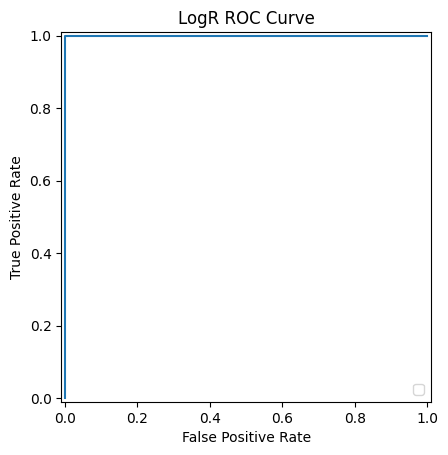

In [32]:
RocCurveDisplay(fpr=fpr, tpr=tpr).plot()
plt.title('LogR ROC Curve')
plt.show()

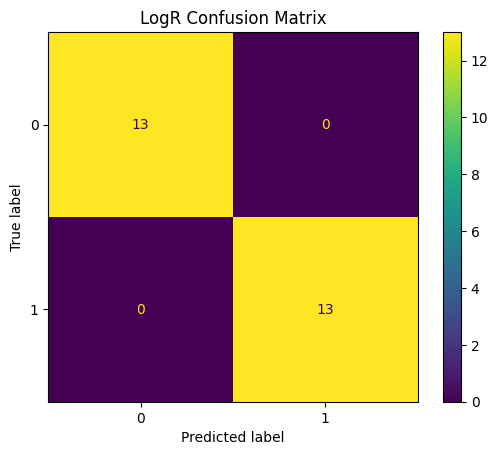

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot()
plt.title('LogR Confusion Matrix')
plt.show()

In [34]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred)}")
print(f"Recall: {recall_score(y_test, y_pred)}")
print(f"F1 Score: {f1_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      1.00      1.00        13

    accuracy                           1.00        26
   macro avg       1.00      1.00      1.00        26
weighted avg       1.00      1.00      1.00        26

